In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
print("hello")

hello


In [2]:
#load the train and test dataset into a dataframe
house_train_df = pd.read_csv("house_train.csv")
house_train_df
house_test_df = pd.read_csv("house_test.csv")
house_test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
1,1,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,2,20,RL,63.0,13072,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2006,WD,Abnorml
3,3,20,RL,NaN,9248,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,4,60,RL,67.0,14948,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2008,New,Partial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,287,20,RL,68.0,9571,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,COD,Abnorml
288,288,20,RL,60.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal
289,289,80,RL,NaN,11333,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
290,290,20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal


In [3]:
# Check the numbers of rows and columns of both dataframe
print("The train data size before dropping Id column is : {} ".format(house_train_df.shape))
print("The test data size before dropping Id column is : {} ".format(house_test_df.shape))

# Save the 'Id' column for future 
train_ID = house_train_df['Id']
test_ID = house_test_df['Id']

# Now remove the 'Id' column since it's unnecessary for the analysis.
house_train_df.drop("Id", axis = 1, inplace = True)
house_test_df.drop("Id", axis = 1, inplace = True)

# Check dataframe size after removing the 'Id' column 
print("\nThe train data size after dropping Id feature is : {} ".format(house_train_df.shape)) 
print("The test data size after dropping Id feature is : {} ".format(house_test_df.shape))

The train data size before dropping Id column is : (1168, 81) 
The test data size before dropping Id column is : (292, 80) 

The train data size after dropping Id feature is : (1168, 80) 
The test data size after dropping Id feature is : (292, 79) 


In [4]:
house_train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,30,RL,63.0,13907,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,108000
1,50,RL,78.0,11344,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,144000
2,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
3,190,RM,60.0,11340,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,122500
4,60,RL,76.0,9591,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,317000


In [5]:
house_test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
1,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,20,RL,63.0,13072,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2006,WD,Abnorml
3,20,RL,NaN,9248,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,60,RL,67.0,14948,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2008,New,Partial


In [5]:
# describe the saleprice to check the mean value.
# from the below data we can say that the saleprice is near to mean value of saleprice

house_train_df["SalePrice"].describe()

count      1168.000000
mean     180657.954623
std       77261.558314
min       34900.000000
25%      130000.000000
50%      163500.000000
75%      213000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# analysis on multivariable which is the most related to sale price

In [6]:
# # Checking the datatypes column in train dataframe
house_train_df.select_dtypes(include=['object']).columns

print(house_train_df.select_dtypes(include=['object']).columns)
print(len(house_train_df.select_dtypes(include=['object']).columns))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
43


In [7]:
# # Checking the numerical datatypes column and number of numerical datatypes in train dataframe
house_train_df.select_dtypes(include=['int64','float64']).columns

print(house_train_df.select_dtypes(include=['int64','float64']).columns)
print(len(house_train_df.select_dtypes(include=['int64','float64']).columns))

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
37


In [8]:
# checking the total number of columns is correct or not
obj = len(house_train_df.select_dtypes(include=['object']).columns)
num = len(house_train_df.select_dtypes(include=['int64','float64']).columns)
print("Total number of columns :", obj , "obj", '+', num, "num", '=' , obj+num ,"columns" )

Total number of columns : 43 obj + 37 num = 80 columns


C:\Users\Shekhar Suman\AppData\Local\Temp\ipykernel_13936\1002786003.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = house_train_df.corr()


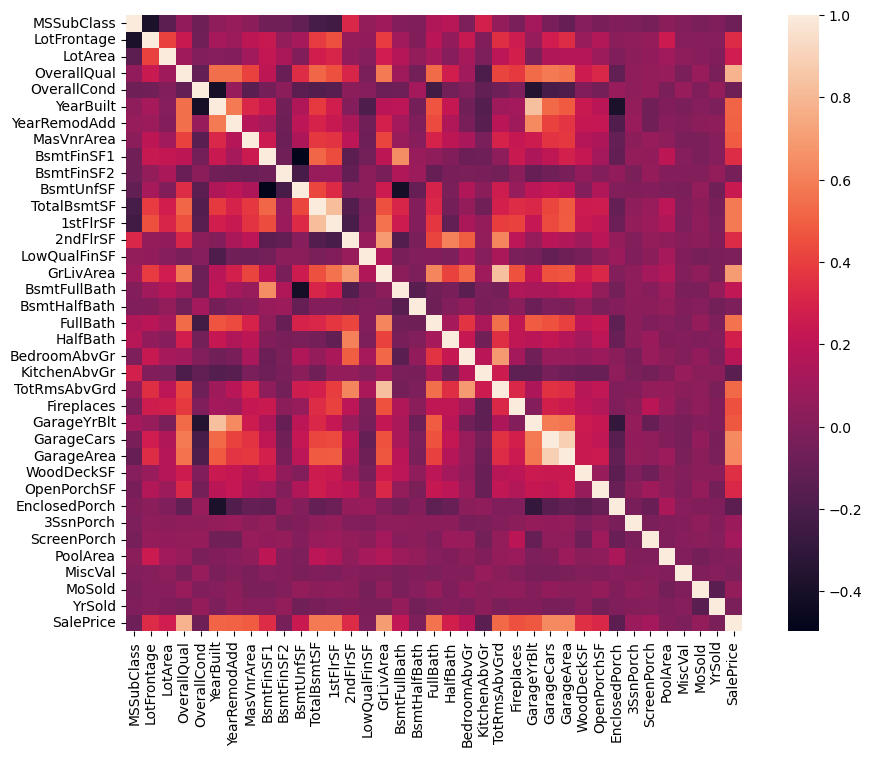

In [9]:
# checked through Correlation Matrix Heatmap to correlate strong relationship between the features
corrmat = house_train_df.corr()
f, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corrmat, vmax= 1, square=True);

# A coefficient of correlation is a value between -1 and +1 that denotes both the strength and directionality of a relationship between two variables.

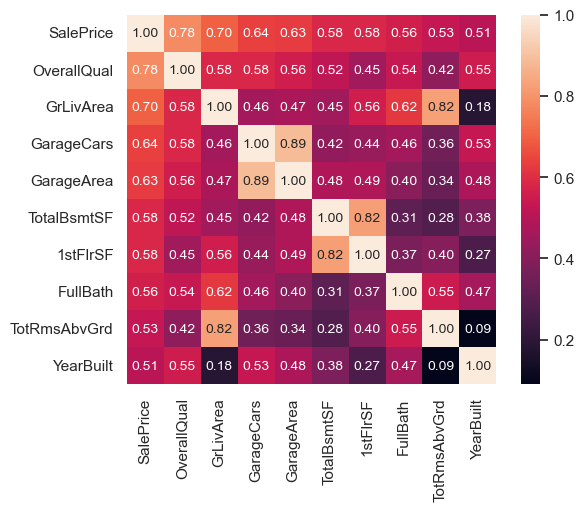

In [10]:
# lets focus on the top 10 features which is most related to sale prices 
m = 10 # number of variables for top 10 heatmap
Top_cols = corrmat.nlargest(m, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house_train_df[Top_cols].values.T)
sns.set(font_scale=1.0)
#sns.heatmap(cm, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=Top_cols.values, xticklabels=Top_cols.values)
plt.show()

In [12]:
# print the most correlated columns into a dataframe
most_corr = pd.DataFrame(Top_cols)
most_corr.columns = ["Most Correlated columns/Features"]
most_corr


,Most Correlated columns/Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


In [ ]:
# description of most correlated columns or features

1.OverallQual: Rates the overall material and finish of the house (1 = Very Poor, 10 = Very Excellent)
2.GrLivArea: Above grade (ground) living area square feet
3.GarageCars: Size of garage in car capacity
4.GarageArea: Size of garage in square feet
5.TotalBsmtSF: Total square feet of basement area
6.1stFlrSF: First Floor square feet
7.FullBath: Full bathrooms above grade
8.TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
9.YearBuilt: Original construction date

# Analysis on top 10 features which affects sale price and clean the uneccessary data from feature column

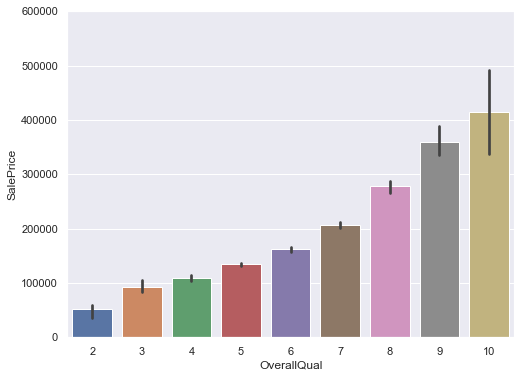

In [15]:
# check Overall Quality vs Sale Price

data_set = pd.concat([house_train_df['SalePrice'], house_train_df['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(x=house_train_df['OverallQual'], y="SalePrice", data=data_set)
#fig = sns.lineplot(x=var, y="SalePrice", data=data_set)
fig.axis(ymin=0, ymax=600000);

# from the below graph, we can clearly see people are paying more for better overallQuality so nothing to remove here

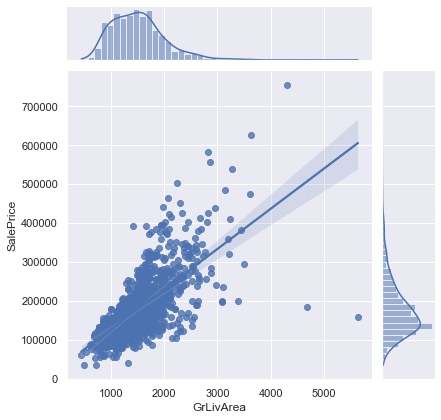

In [16]:
# check above ground Living Area vs Sale Price

sns.jointplot(x=house_train_df['GrLivArea'], y=house_train_df['SalePrice'], kind='reg')

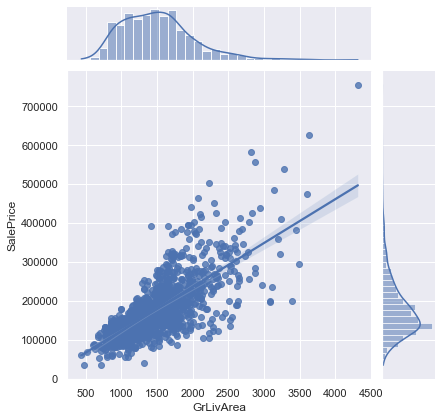

In [17]:
# from above graph we can observe people are paying more for more living area except for two right bottom data points 

# we need to remove these two right botton data points because it does not make sense which is less sales price for more living area 

# Removing two bottom right points manually

house_train_df = house_train_df.drop(house_train_df[(house_train_df['GrLivArea']>4000) 
                         & (house_train_df['SalePrice']<300000)].index).reset_index(drop=True)

#check living area vs sale price after removing two data points
sns.jointplot(x=house_train_df['GrLivArea'], y=house_train_df['SalePrice'], kind='reg')

# Now it looks Nice!!

,No of garage cars
0,0
1,1
2,3
3,2
4,3
...,...
1161,2
1162,2
1163,2
1164,2


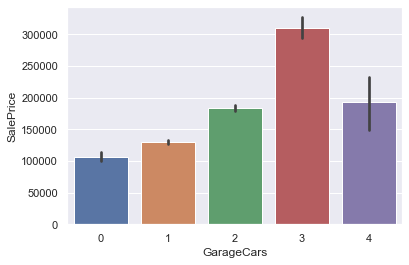

In [18]:
# checking size of garage cars[no. og garage cars] vs sale price
sns.barplot(x=house_train_df['GarageCars'], y=house_train_df['SalePrice'])

garage_cars = pd.DataFrame(house_train_df['GarageCars'])
garage_cars.columns = ['No of garage cars']
garage_cars


<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

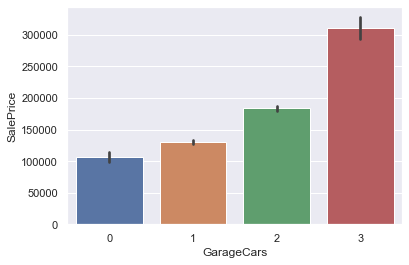

In [19]:
# from above graph we can see that sales price is less for 4 number of car garages 
# which does not make sense so we need to remove 4-garageCars data
# Removing these data manually (More than and equal to 4-cars, less than $250k)

house_train_df = house_train_df.drop(house_train_df[(house_train_df['GarageCars']>3) 
                         & (house_train_df['SalePrice']<3000000)].index).reset_index(drop=True)

# checking size of garage cars[no. og garage cars] vs sale price after removing 4-garageCars data 

sns.barplot(x=house_train_df['GarageCars'], y=house_train_df['SalePrice'])

# Now it looks fine :)
# more number of garageCars come with more salePrice which can make sense 

In [20]:
house_train_df.shape

(1161, 80)

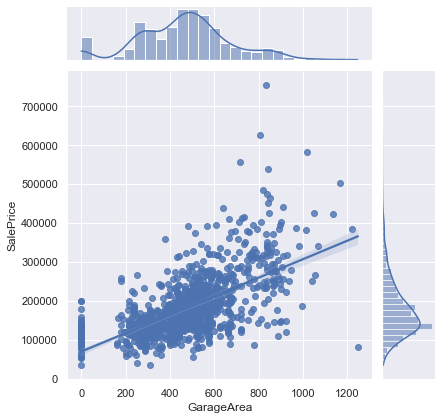

In [21]:
#checking Garage Area(sqft) vs Sale Price
sns.jointplot(x=house_train_df['GarageArea'], y=house_train_df['SalePrice'], kind='reg')

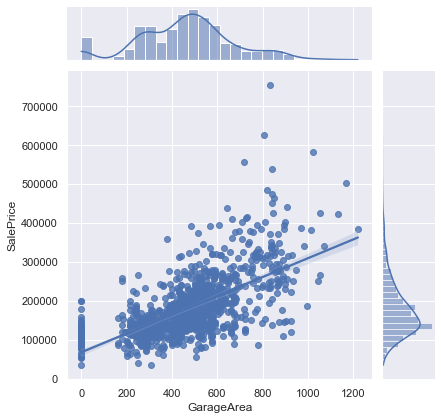

In [22]:
# again 3 right bottom points need to be removed because it does not make sense [ more GarageArea is having less Saleprice ]
# Removing these 3 right bottom points manually (More than 1200 sqft, less than $300k)

house_train_df = house_train_df.drop(house_train_df[(house_train_df['GarageArea']>1200) 
                         & (house_train_df['SalePrice']<300000)].index).reset_index(drop=True)

# checking Garage Area(sqft) vs Sale Price after removing 3 right bottom points
sns.jointplot(x=house_train_df['GarageArea'], y=house_train_df['SalePrice'], kind='reg')

In [23]:
house_train_df.shape

(1160, 80)

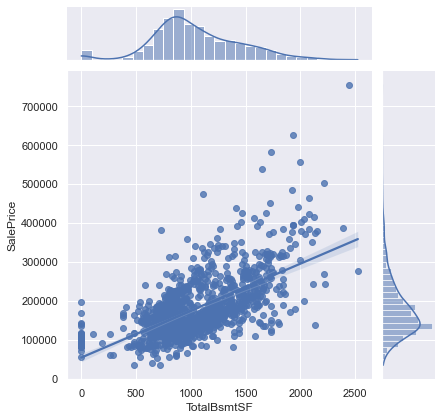

In [24]:
# checking basement Area vs Sale price
sns.jointplot(x=house_train_df['TotalBsmtSF'], y=house_train_df['SalePrice'], kind='reg')

In [25]:
# check the data which is to be removed 

removed_df = pd.DataFrame(house_train_df[(house_train_df['TotalBsmtSF']>6000) 
                         & (house_train_df['SalePrice']<300000)])
removed_df[["TotalBsmtSF","SalePrice"]]

# removing 1 right bottom point which does not make sense [minimun sale price for more Total basement area which can not be possible]
house_train_df = house_train_df.drop(house_train_df[(house_train_df['TotalBsmtSF']>6000) 
                         & (house_train_df['SalePrice']<300000)].index).reset_index(drop=True)

removed_df[["TotalBsmtSF","SalePrice"]]

,TotalBsmtSF,SalePrice


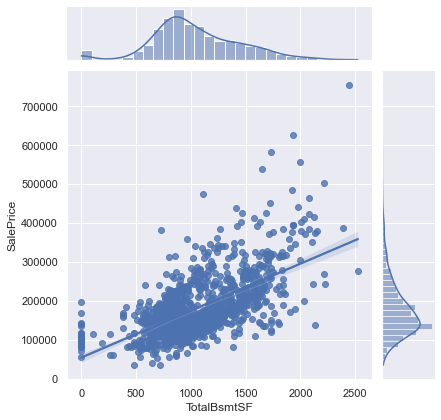

In [26]:
# checking basement Area vs Sale price after removing one right bottom point from the above graph
sns.jointplot(x=house_train_df['TotalBsmtSF'], y=house_train_df['SalePrice'], kind='reg')

In [27]:
house_train_df.shape

(1160, 80)

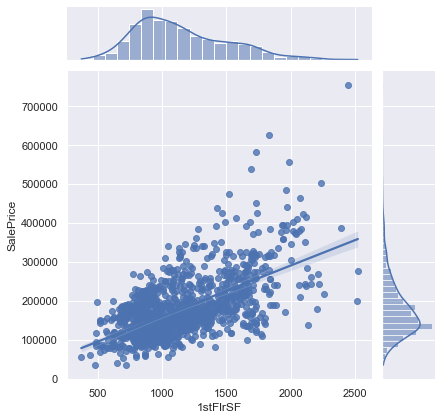

In [28]:
# checking First Floor Area vs Sale Price
sns.jointplot(x=house_train_df['1stFlrSF'], y=house_train_df['SalePrice'], kind='reg')

,1stFlrSF,SalePrice


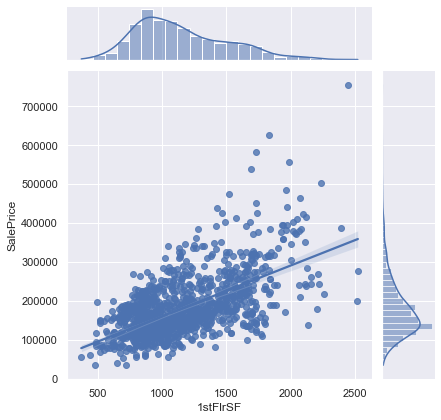

In [29]:
# again 2 bottom right points need to be removed which does not make sense [mimimun sale price for max First floor area]

house_train_df = house_train_df.drop(house_train_df[(house_train_df['1stFlrSF']>3000) 
                         & (house_train_df['SalePrice']<300000)].index).reset_index(drop=True)

removed_df = pd.DataFrame(house_train_df[(house_train_df['1stFlrSF']>3000) 
                         & (house_train_df['SalePrice']<300000)])
removed_df[["1stFlrSF","SalePrice"]]

# checking First Floor Area vs Sale Price after removing two right bottom points

sns.jointplot(x=house_train_df['1stFlrSF'], y=house_train_df['SalePrice'], kind='reg')

removed_df[["1stFlrSF","SalePrice"]]
#  Now everything looks fine here

In [30]:
house_train_df.shape

(1160, 80)

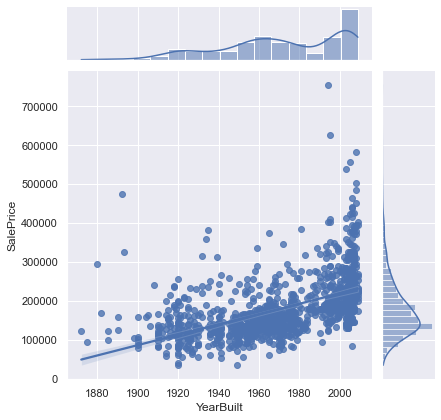

In [31]:
# checking year built vs sale price
sns.jointplot(x=house_train_df['YearBuilt'], y=house_train_df['SalePrice'], kind='reg')


# Lets check the missing and cleaned data into train and test dataframe

In [32]:
house_train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,30,RL,63.0,13907,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,108000
1,50,RL,78.0,11344,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,7,2007,WD,Normal,144000
2,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
3,190,RM,60.0,11340,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,122500
4,60,RL,76.0,9591,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,317000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,70,RL,60.0,13515,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,180500
1156,20,RL,80.0,8700,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,12,2008,WD,Normal,155000
1157,120,RL,32.0,10846,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,5,2008,Con,Normal,324000
1158,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,179665


In [33]:
# Combining both train and test dataframe into one dataframe 
ntrain = house_train_df.shape[0]
ntest = house_test_df.shape[0]
y_train = house_train_df.SalePrice.values
all_data = pd.concat((house_train_df, house_test_df)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("Train data size is : {}".format(house_train_df.shape))
print("Test data size is : {}".format(house_test_df.shape))
print("Combined dataset size is : {}".format(all_data.shape))

Train data size is : (1160, 80)
Test data size is : (292, 79)
Combined dataset size is : (1452, 79)


In [34]:
# now Find Missing Ratio of combined dataset (both train and test dataset)
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:20]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
PoolQC,99.586777
MiscFeature,96.349862
Alley,93.801653
Fence,80.716253
FireplaceQu,47.245179
LotFrontage,17.768595
GarageType,5.578512
GarageYrBlt,5.578512
GarageFinish,5.578512
GarageQual,5.578512


Text(0.5, 1.0, 'Percent missing data by feature')

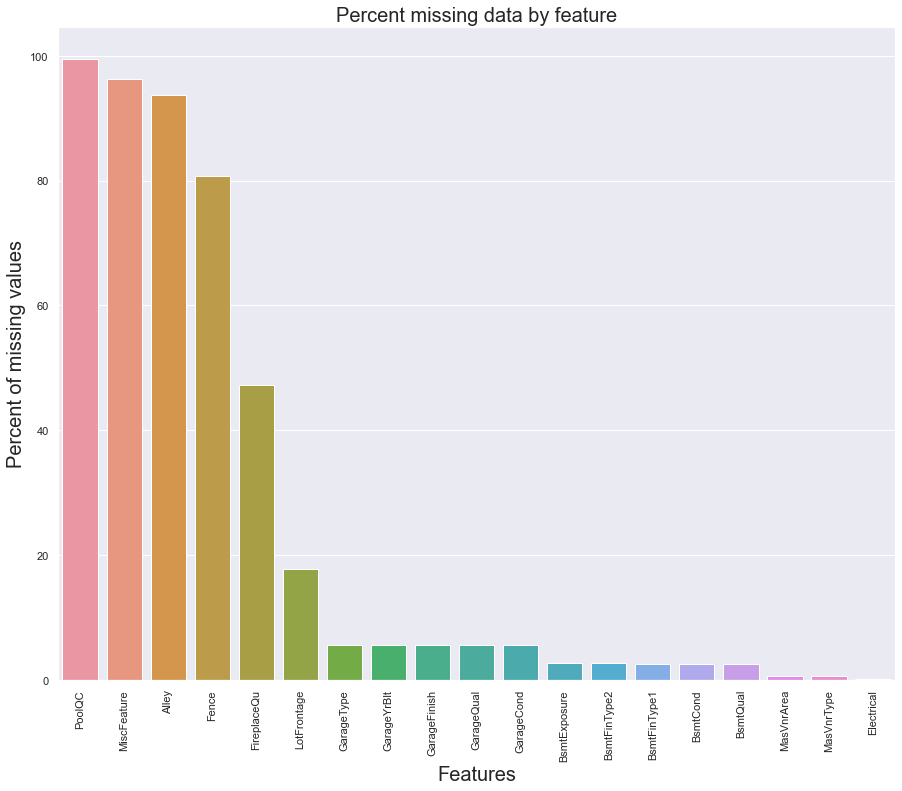

In [35]:
# check above missing ratio dataframe with the help of a suitable bargraph
# percent(%) of missing value vs Features

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Percent of missing values', fontsize=20)
plt.title('Percent missing data by feature', fontsize=20)

In [36]:
# now fill the missing value with none 

all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
#all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

# all the missing value and cleaned data is filled with None value